Infection cleared.
0.5704054993894149


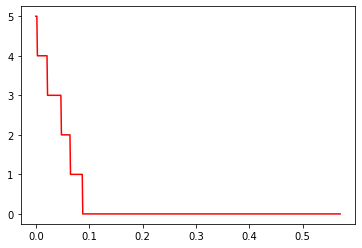

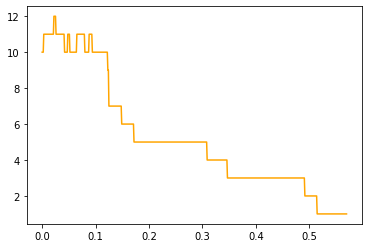

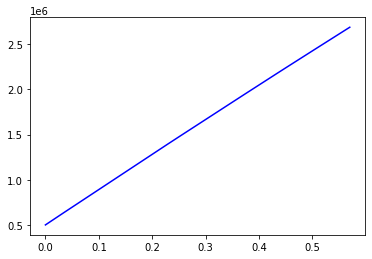

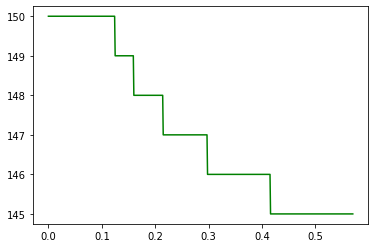

In [1]:
# Demo written by my professor on PILPS 
# To understand SIR Model

import random
import matplotlib.pyplot as plt
import numpy as np

number_of_reactions = 8

x_vir = []
x_inf_cell  = []
x_immune_cell = []
x_susc_cell  = []
x_time = []


t_max = 20.0 # 100 days running
time  = 0
t_out  = 1.0*10**(-6) # time step for writeout        
i_out  = 1 # parameter for writeout
d_time = 1.0*10**(-6) # parameter for writeout



n_vir = 5 # - no. of virus particles  
n_inf_cell = 10 # - no. of infected cells
#n_inf_cell = 100 # - no. of infected cells
n_immune_cell = 150 # - no. of immune cells (start)
n_susc_cell = 500000 # - no. of uninfected cells (start)

beta = 5.700*10**(-6)  #beta  - infectivity rate
#beta = 1.000*10**(-6)  #beta  - infectivity rate; leads to quick clearance
alph = 5.000*10**(-2)  #alpha - removal infected cell by immune
gamm = 8.000*10**(-5)  #gamma - removal virus by immune


        
pt = 4.00*10**(6)   #Pt - target cell
pe = 5.00*10**(-5)  #Pe - immune from infected
#pe = 1.00*10**(5)  #Pe - immune system super strong, eradicates everything


dt = 0.10   #0.10d0   !Dt  (1/day) - death target cell
di = 0.50   #0.50d0   !Di  (1/day) - death infected cell
de = 0.10   #0.10d0   !De  (1/day) - death immune cell

# probability vector
b = np.array([0,0,0,0,0,0,0,0])


# infection modelling

while time < t_max:
    #stop when infection is cleared
    if n_vir == 0 and n_inf_cell == 0:
        print('Infection cleared.')
        break
        
    if n_susc_cell == 0:
        print('Oh dear, it is all over.')
        break
    
    #tmp = random.randint(1,number_of_reactions)
  
    
    # calculate rates and probabilities for the different reactions
    b[0] = pt          
    b[1] = beta * n_susc_cell * n_vir 
    b[2] = pe * n_immune_cell * n_inf_cell          
    b[3] = dt * n_susc_cell          
    b[4] = di * n_inf_cell
    b[5] = de * n_immune_cell          
    b[6] = alph * n_immune_cell * n_inf_cell          
    b[7] = gamm * n_immune_cell * n_vir

    b_tot=np.sum(b)

    
    #select time interval for tau jumping
    r = random.random()
    if r < 10**(-9):
        r = random.random() # 0 does occasionally happen - if so override
         
    tau = np.log(1.0/r)
    tau = tau/b_tot
    time = time + tau 
    
    
    #pick which reaction is likely to occur because of the relative probabilities
    r = random.random()          
    r = r * b_tot 
    i = 0
    b_tot = 0.0
    while b_tot < r:
        b_tot = b_tot + b[i]
        i = i + 1

        
    #write out in a staggered way 
    if ( time >= t_out ):
        x_vir.append(n_vir)
        x_inf_cell.append(n_inf_cell)
        x_susc_cell.append(n_susc_cell)
        x_immune_cell.append(n_immune_cell)
        x_time.append(time)
   
   
        i_out = i_out + 1
        t_out = t_out + d_time

        if ( i_out == 10 ):
            i_out = 1
            if ( d_time < 0.001 ):
                d_time = d_time * 10.0
            
    
    # different coupled reactions and how they affect the species numbers
    
    # susceptible cell birth
    if i == 1:
        n_susc_cell +=  1        
    
    # infect susceptible cell 
    if i == 2:
        if n_vir > 0:
            n_susc_cell -= 1
            n_inf_cell  += 1
            n_vir -= 1  
            
    # immune cell birth
    if i == 3:
        n_immune_cell +=  1
        
    # susceptible cell death 
    if i == 4:
        n_susc_cell -= 1
        
    # infected cell death 
    if i == 5:
        n_inf_cell -= 1
        n_vir += 2000
        
    # immune cell death 
    if i == 6:
        n_immune_cell -= 1
        
    # infected cell removal by immune system 
    if i == 7:
        n_inf_cell -= 1

    # virus particle removal by immune system 
    if i == 8:
        n_vir -= 1
        
    
print(time)

# plot all 4 species
plt.plot(x_time, x_vir, color = 'red')
plt.show()
plt.plot(x_time, x_inf_cell,  color = 'orange')
plt.show()
plt.plot(x_time, x_susc_cell,  color = 'blue')
plt.show()
plt.plot(x_time, x_immune_cell, color = 'green')
plt.show()
